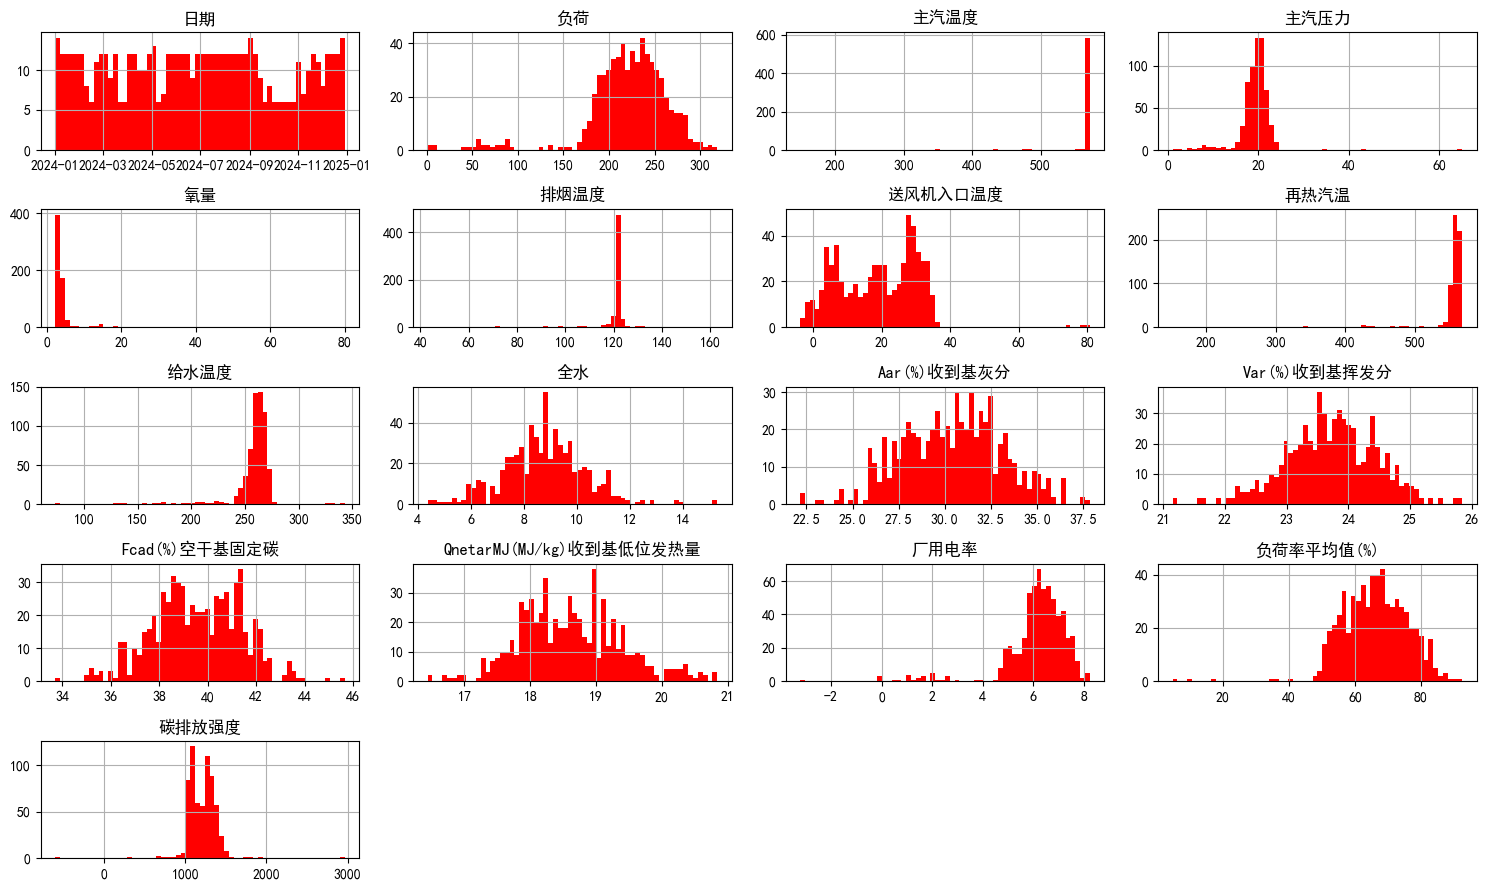

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
# 设置中文字体为 SimHei（黑体）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体 SimHei
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
df=pd.read_excel("../data/数据整合cleaned.xlsx")
df.hist(bins=60, figsize=(15,9),color="red")
plt.tight_layout()
plt.show()

### 使用IQR方法去除异常值

In [2]:
def remove_outlier(df,columns):
    # 1st quartile (25%)
    Q1 = np.percentile(df[columns], 25)
    # 3rd quartile (75%)
    Q3 = np.percentile(df[columns],75)
    # Interquartile range (IQR)
    IQR = Q3 - Q1
    # outlier step
    outlier_step = 1.5 * IQR
    df_out = df[(df[columns]>=Q1-outlier_step) & (df[columns]<=Q3+outlier_step)]
    return df_out

In [3]:
df = remove_outlier(df,'碳排放强度')
df = remove_outlier(df,'主汽温度')
df = remove_outlier(df,'主汽压力')
df = remove_outlier(df,'氧量')
df = remove_outlier(df,'排烟温度')
df = remove_outlier(df,'再热汽温')
df = remove_outlier(df,'给水温度')

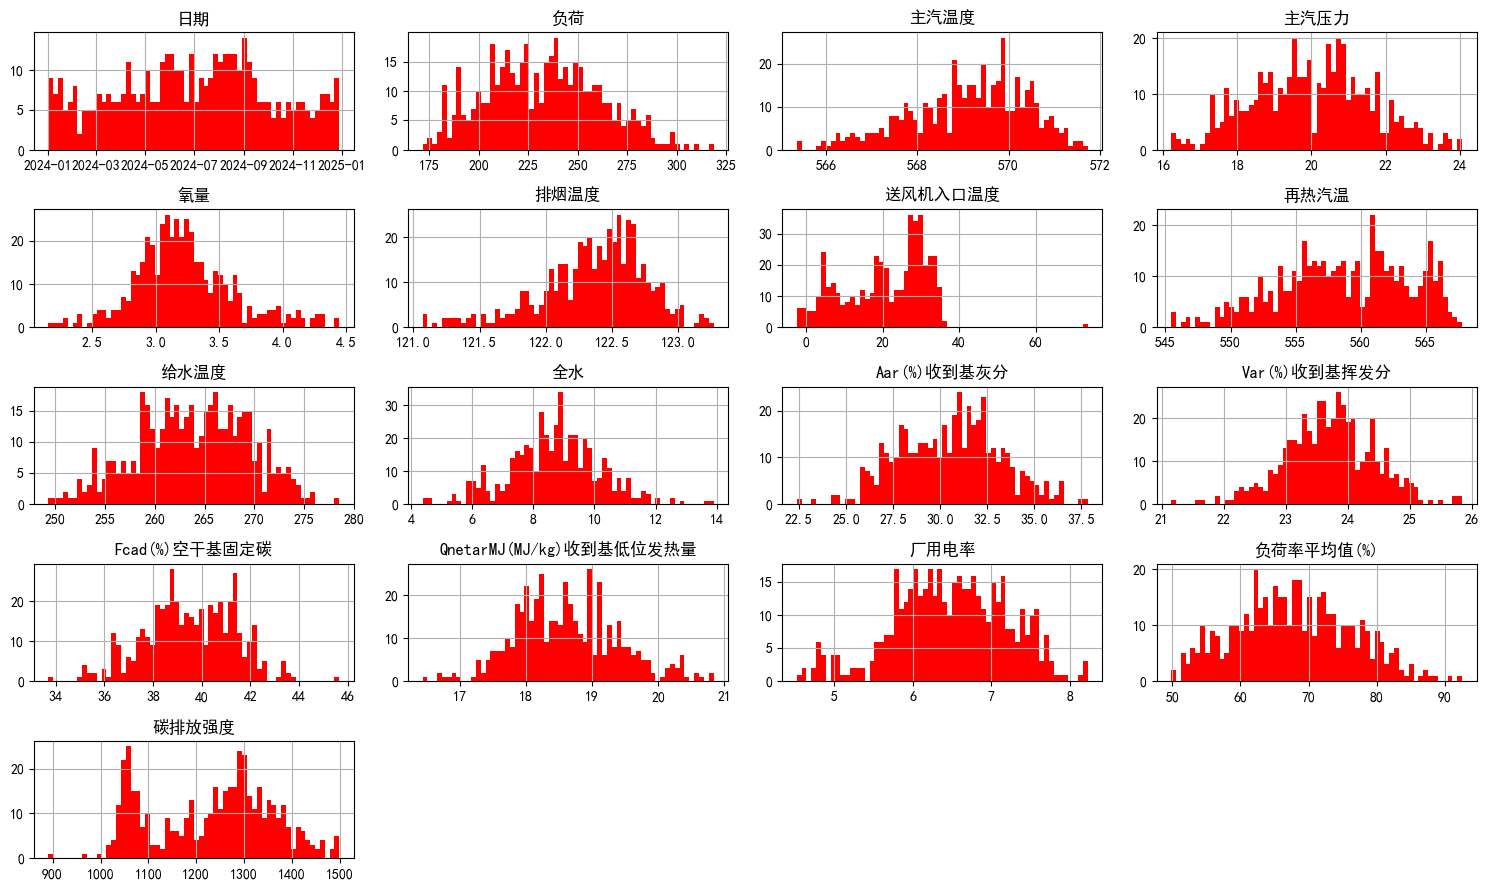

In [5]:
df_out_1 = df[(df["厂用电率"]>0)]
df_out_1.hist(bins=60, figsize=(15,9),color="red")
plt.tight_layout()
plt.show()

In [6]:
df_out_1.to_excel("../data/数据整合cleaned去除异常值.xlsx")